In [1]:
!pip install jupyter_contrib_nbextensions
!pip install fastai
!pip install fastai --upgrade

     |████████████████████████████████| 354 kB 671 kB/s eta 0:00:01


  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.10
    Uninstalling fastai-2.0.10:
      Successfully uninstalled fastai-2.0.10


In [2]:
import numpy as np 
import pandas as pd 
import os


from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders
from fastai.metrics import error_rate

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [4]:
classes = ['Boletus','Entoloma','Russula','Suillus','Lactarius','Amanita','Agaricus','Hygrocybe','Cortinarius']

In [6]:
path = Path("Mushrooms")
print(path)

Mushrooms


In [7]:
dls = ImageDataLoaders.from_folder(path,
                                   valid_pct=0.2,
                                   item_tfms=Resize(224),
                                   batch_tfms=Normalize.from_stats(*imagenet_stats),
                                   num_workers=4,
                                  )

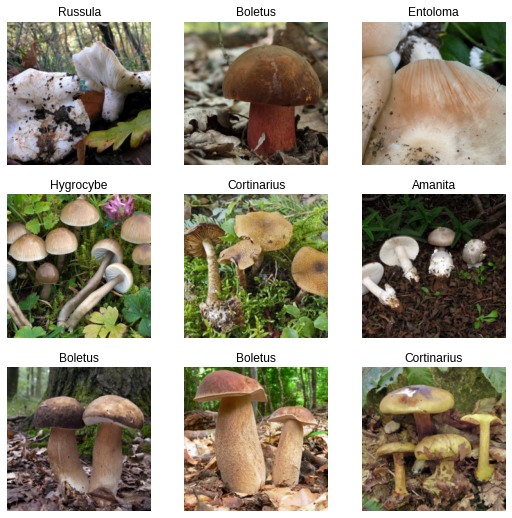

In [8]:
dls.show_batch()

In [9]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.579629,0.988449,0.289866,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.747692,0.584470,0.183308,00:32
1,0.486843,0.632027,0.178838,00:32
2,0.228434,0.319098,0.111028,00:32
3,0.087484,0.301364,0.106557,00:32


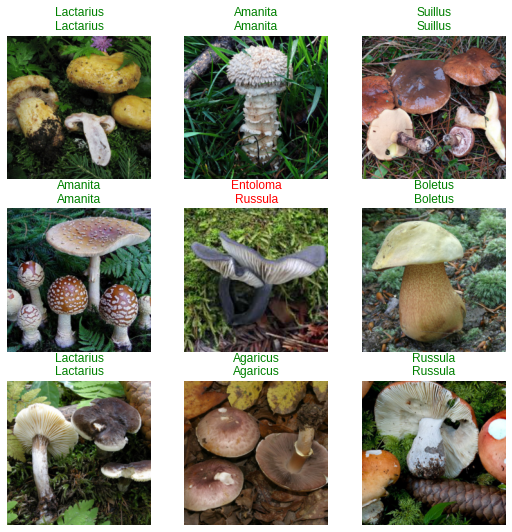

In [12]:
learn.show_results()